In [1]:
#import the necessary libraries

import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# read each of the csv files that entails the covid cases
confirmed_cases = pd.read_csv("confirmed_cases.csv")

death_cases = pd.read_csv("death_cases.csv")

country_population = pd.read_csv("country_population.csv")




In [3]:
confirmed_cases

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,4546,4645,4705,4770,4847,4879,4902,4970,4998,5075
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,14440,14656,14845,15052,15202,15327,15417,15572,15701,15841
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,1575,1597,1614,1634,1648,1658,1663,1679,1685,1696
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,1923,1944,1981,2015,2038,2051,2060,2090,2109,2113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,3061,3083,3108,3153,3157,3162,3187,3210,3222,3250
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,2216,2239,2260,2346,2348,2353,2447,2497,2502,2579
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,1597,1618,1668,1693,1693,1708,1744,1764,1774,1794
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,783,789,794,797,800,805,817,825,830,837


In [4]:
death_cases

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,50,50,50,50,53,54,55,55,55,55
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,169,171,171,171,173,173,173,175,175,177
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,33,35,35,35,35,35,35,35,35,36
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,46,47,47,47,47,47,47,47,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,19,19,24,24,24,24,24,26,26,26
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,7,7,8,8,8,8,8,9,9,9
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,21,21,21,21,21,21,21,23,23,23


In [5]:

country_population

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394
...,...,...,...,...
3190,56037,Sweetwater County,WY,42343
3191,56039,Teton County,WY,23464
3192,56041,Uinta County,WY,20226
3193,56043,Washakie County,WY,7805


In [6]:
#country_population.isnull().sum()

In [7]:
confirmed_cases["Population"] = country_population["population"]

confirmed_cases

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,Population
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,4645,4705,4770,4847,4879,4902,4970,4998,5075,55869
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,14656,14845,15052,15202,15327,15417,15572,15701,15841,223234
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,1597,1614,1634,1648,1658,1663,1679,1685,1696,24686
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,1944,1981,2015,2038,2051,2060,2090,2109,2113,22394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,3083,3108,3153,3157,3162,3187,3210,3222,3250,42343
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,2239,2260,2346,2348,2353,2447,2497,2502,2579,23464
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,1618,1668,1693,1693,1708,1744,1764,1774,1794,20226
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,789,794,797,800,805,817,825,830,837,7805


In [8]:
#using the melt function to combine the dates columns into one colum

# confirmedCases = confirmed_cases.melt(id_vars =['countyFIPS','County Name','State','stateFIPS', 'Population'], value_name = 'No of Cases', var_name ='Date')

confirmedCases = pd.melt(confirmed_cases, id_vars =['countyFIPS','County Name','State','stateFIPS', 'Population'], value_name = 'No of Cases', var_name ='Date')
    
confirmedCases




    


,countyFIPS,County Name,State,stateFIPS,Population,Date,No of Cases
0,0,Statewide Unallocated,AL,1,0,1/22/20,0
1,1001,Autauga County,AL,1,55869,1/22/20,0
2,1003,Baldwin County,AL,1,223234,1/22/20,0
3,1005,Barbour County,AL,1,24686,1/22/20,0
4,1007,Bibb County,AL,1,22394,1/22/20,0
...,...,...,...,...,...,...,...
1147000,56037,Sweetwater County,WY,56,42343,1/14/21,3250
1147001,56039,Teton County,WY,56,23464,1/14/21,2579
1147002,56041,Uinta County,WY,56,20226,1/14/21,1794
1147003,56043,Washakie County,WY,56,7805,1/14/21,837


In [9]:
deathCases = death_cases.melt(id_vars =['countyFIPS','County Name','State','stateFIPS'], value_name = 'No of Death', var_name = 'Date')

deathCases

,countyFIPS,County Name,State,stateFIPS,Date,No of Death
0,0,Statewide Unallocated,AL,1,1/22/20,0
1,1001,Autauga County,AL,1,1/22/20,0
2,1003,Baldwin County,AL,1,1/22/20,0
3,1005,Barbour County,AL,1,1/22/20,0
4,1007,Bibb County,AL,1,1/22/20,0
...,...,...,...,...,...,...
1147000,56037,Sweetwater County,WY,56,1/14/21,26
1147001,56039,Teton County,WY,56,1/14/21,4
1147002,56041,Uinta County,WY,56,1/14/21,9
1147003,56043,Washakie County,WY,56,1/14/21,23


In [10]:
#Adding the death Cases column from deathCases
confirmedCases['No of Death'] = deathCases['No of Death']
joined_dataset = confirmedCases

joined_dataset

,countyFIPS,County Name,State,stateFIPS,Population,Date,No of Cases,No of Death
0,0,Statewide Unallocated,AL,1,0,1/22/20,0,0
1,1001,Autauga County,AL,1,55869,1/22/20,0,0
2,1003,Baldwin County,AL,1,223234,1/22/20,0,0
3,1005,Barbour County,AL,1,24686,1/22/20,0,0
4,1007,Bibb County,AL,1,22394,1/22/20,0,0
...,...,...,...,...,...,...,...,...
1147000,56037,Sweetwater County,WY,56,42343,1/14/21,3250,26
1147001,56039,Teton County,WY,56,23464,1/14/21,2579,4
1147002,56041,Uinta County,WY,56,20226,1/14/21,1794,9
1147003,56043,Washakie County,WY,56,7805,1/14/21,837,23


In [11]:
#setting the ML features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

X =joined_dataset[["countyFIPS","stateFIPS","Population", "No of Cases"]]
Y = joined_dataset["No of Death"]

In [12]:

#fits the line
lm = linear_model.LinearRegression()

model = lm.fit(X, Y)

In [13]:

prediction = lm.predict(X)

In [14]:
prediction

array([-8.9881663 , -0.28244791, 26.46781223, ..., 36.66678343,
       17.2082155 , 12.77682531])

In [15]:
#creating a DF to show the actual and predicted values
output_data = pd.DataFrame({})
output_data["Actual"] = Y
output_data["Predicted"] = prediction
output_data["Population of each states"] = joined_dataset["Population"]

output_data

,Actual,Predicted,Population of each states
0,0,-8.988166,0
1,0,-0.282448,55869
2,0,26.467812,223234
3,0,-5.267464,24686
4,0,-5.634252,22394
...,...,...,...
1147000,26,66.786250,42343
1147001,4,51.517231,23464
1147002,9,36.666783,20226
1147003,23,17.208215,7805


In [16]:
lm.score(X,Y)

0.6169344187635919

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [18]:
model1 = LinearRegression()

In [19]:
lm_fit = model1.fit(x_train, y_train)

In [20]:
predicts = lm_fit.predict(x_test)

In [21]:
predicts

array([-3.10032119,  4.06391672, 37.44863718, ..., 53.00415049,
       22.97371337, -0.18844222])

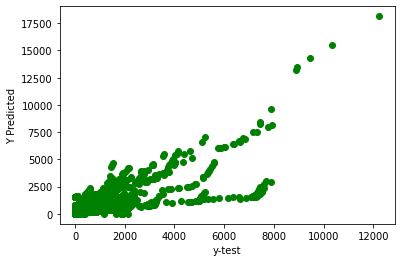

In [26]:
plt.scatter(y_test, predicts, c='g')
plt.xlabel('y-test')
plt.ylabel("Y Predicted")
plt.show()